# **Bienes Raíces**
![texto del enlace](https://drive.google.com/uc?id=18kthH8l3xngz1fRdwvO_Qlv5YTcFHc3Z)

**Introducción:**

Predicción del precio: Dentro de este notebook se encuentra el proceso de creación de diferentes algoritmos de regresión lineal con el objetivo de elegir el que tenga mejores resultados y así, predecir el precio de una casa dependiendo de sus distintas características.

**Dataset:**

* **id** ---> Unico ID por cada casa vendida
* **date** ---> Fecha de venta
* **price** ---> Precio de cada casa vendida
* **bedrooms** ---> Número de habitaciones
* **bathrooms** ---> Número de baños, donde .5 representa una habitación con baño pero sin ducha.
* **sqft_living** ---> Metros cuadrados de los departamentos.
* **sqft_lot** ---> Metros cuadrados del espacio terrestre.
* **floors** ---> Número de pisos.
* **waterfront** ---> Frente al mar.
* **view** ---> Índice del 0 al 4 de cuan buena era la vista de la propiedad.
* **condition** ---> Índice del 1 al 5 sobre la condición del apartamento.
* **grade** ---> Índice del 1 al 13, donde 1-3 no alcanza la construcción y diseño de edificios, 7 tiene un nivel medio de construcción y diseño, y 11-13 tiene un nivel de calidad de construcción y diseño alto.
* **sqft_above** ---> Los pies cuadrados del espacio interior de la vivienda que está sobre el nivel del suelo.
* **sqft_basement** ---> Los pies cuadrados del espacio interior de la vivienda que está debajo del nivel del suelo.
* **yr_built** ---> El año en que se construyó la casa.
* **yr_renovated** ---> El año en que se hizo la ultima reforma de la casa.
* **zipcode** ---> Area donde se encuentra el codigo postal de la casa.
* **lat** ---> Latitud.
* **long** ---> Longitud.
* **qft_living15** ---> Los pies cuadrados de espacio habitable interior de la vivienda para los 15 vecinos más cercanos.
* **sqft_lot15** ---> Los metros cuadrados de los terrenos de los 15 vecinos más cercanos.

In [111]:
#Procesamiento de datos
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import FunctionTransformer, StandardScaler, RobustScaler

#Set de entrenamiento
from sklearn.model_selection import train_test_split

#Validación de modelos
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_val_score

#Modelos de regresión lineal y Optimización
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

## Extraer Datos
![texto del enlace](https://drive.google.com/uc?id=1LQOevK6f3FrmZshRlpjm0MnAxwBxCfF4)

In [112]:
df = pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


## Procesar Datos
![texto del enlace](https://drive.google.com/uc?id=1b1Exbf7okX506bhP6sz9Xb6mHF25WG--)

In [113]:
#Borramos las columnas que no vamos a usar
df2 = df.drop(['id', 'date'], axis=1)

In [114]:
#Vemos la cantidad de filas y columnas que tiene nuestro dataset
df2.shape

(21613, 19)

In [115]:
#Verificamos que no haya ningún dato null
df2.isna().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

## Explorar Datos
![texto del enlace](https://drive.google.com/uc?id=1oGoYi8C5K_XK-mS8CXJPuXpGyqKgCQBR)

In [116]:
#Vemos la descripción del dataset
df2.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [117]:
#Por cada columna del dataset, verificamos sus posibles valores
for column in df2.columns:
    print('******' * 10)
    print(df2[column].value_counts())

************************************************************
price
350000.0     172
450000.0     172
550000.0     159
500000.0     152
425000.0     150
            ... 
607010.0       1
1362500.0      1
298800.0       1
957500.0       1
402101.0       1
Name: count, Length: 4028, dtype: int64
************************************************************
bedrooms
3     9824
4     6882
2     2760
5     1601
6      272
1      199
7       38
0       13
8       13
9        6
10       3
11       1
33       1
Name: count, dtype: int64
************************************************************
bathrooms
2.50    5380
1.00    3852
1.75    3048
2.25    2047
2.00    1930
1.50    1446
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      72
4.75      23
5.00      21
5.25      13
0.00      10
5.50      10
1.25       9
6.00       6
0.50       4
5.75       4
6.75       2
8.00       2
6.25       2
6.50       2
7.50       1
7.75       1
Name: 

In [118]:
#En la columna de waterfloor, al haber en su mayoría más casos con valores
#0, vamos a descartar las filas con valores 1 para que el
#modelo no entrene con valores ruidosos
df_cleaning= (df2['waterfront'] == 0)
df_clean = df2[df_cleaning]
df_clean.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [119]:
df_clean = df_clean.drop('waterfront', axis=1)
df_clean.head(2)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639


In [120]:
df_clean.shape

(21450, 18)

In [121]:
#Hecho esto, se tiene que tener en cuenta que ahora hay indices faltantes, por
# lo que tenemos que hacer un reset de este para no tener problemas más adelante
df_clean.reset_index(inplace= True)
df_clean.head(2)

,index,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,221900.0,3,1.00,1180,5650,1.0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,538000.0,3,2.25,2570,7242,2.0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639


In [122]:
df_clean = df_clean.drop('index', axis=1)

In [123]:
#Verificamos que todas las columnas tengan el tipo de dato correcto
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21450 entries, 0 to 21449
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21450 non-null  float64
 1   bedrooms       21450 non-null  int64  
 2   bathrooms      21450 non-null  float64
 3   sqft_living    21450 non-null  int64  
 4   sqft_lot       21450 non-null  int64  
 5   floors         21450 non-null  float64
 6   view           21450 non-null  int64  
 7   condition      21450 non-null  int64  
 8   grade          21450 non-null  int64  
 9   sqft_above     21450 non-null  int64  
 10  sqft_basement  21450 non-null  int64  
 11  yr_built       21450 non-null  int64  
 12  yr_renovated   21450 non-null  int64  
 13  zipcode        21450 non-null  int64  
 14  lat            21450 non-null  float64
 15  long           21450 non-null  float64
 16  sqft_living15  21450 non-null  int64  
 17  sqft_lot15     21450 non-null  int64  
dtypes: flo

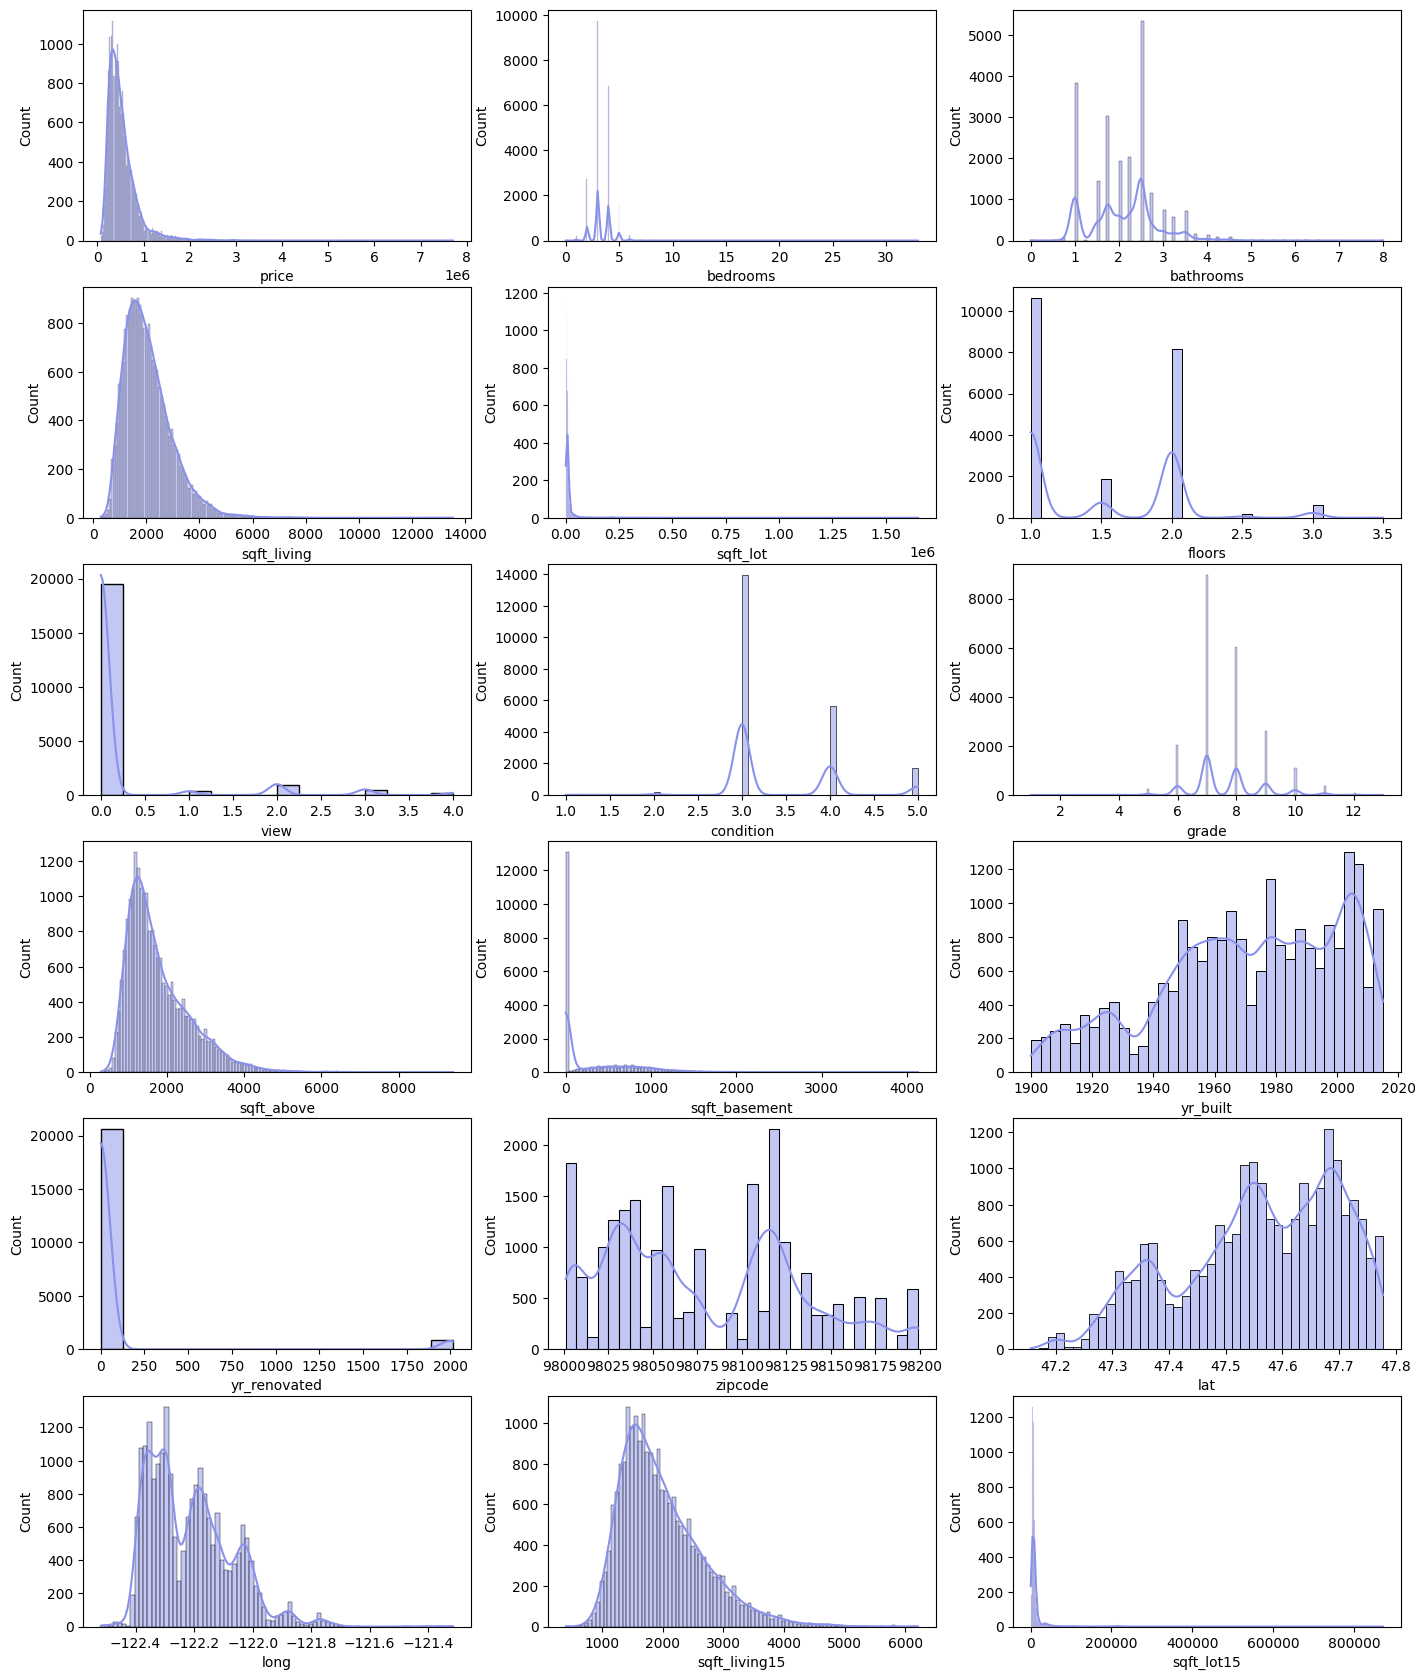

In [124]:
#Observamos la distribución de todas las columnas
fig = plt.figure(figsize=(17,21))
iter =0
for i in df_clean.columns:
    ax = fig.add_subplot(6,3, iter+1)
    sns.histplot(data=df_clean, x=df_clean[i], color='#8991EB', ax=ax, kde=True)
    iter +=1
plt.show()

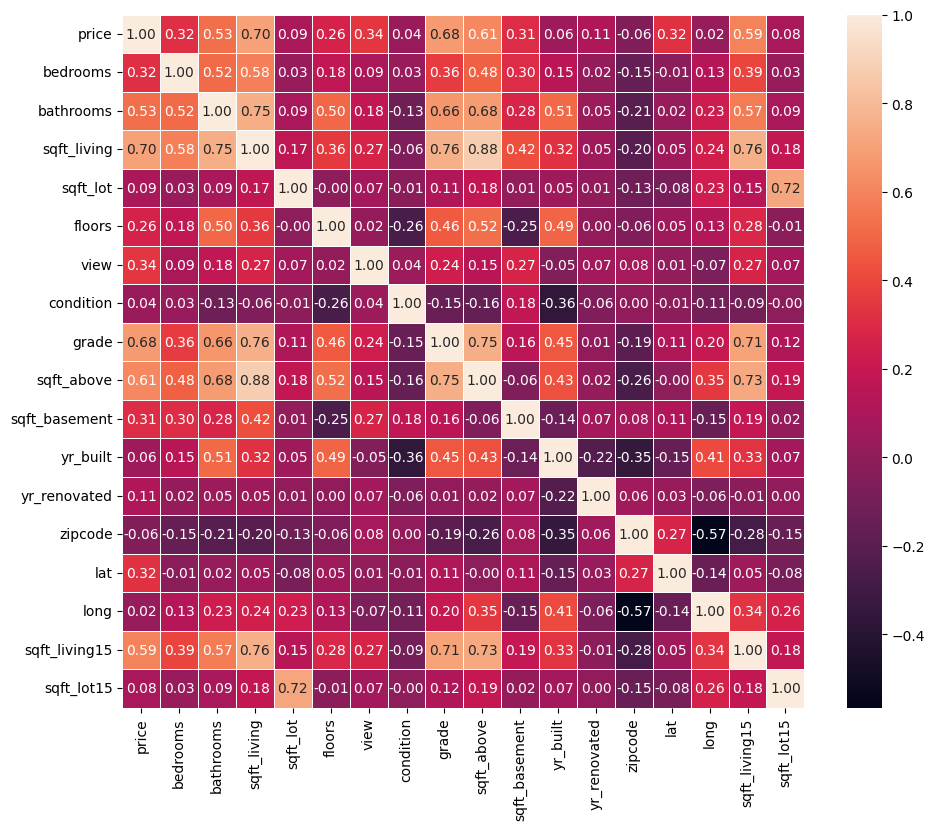

In [125]:
#Graficamos la correlación entre las columnas
fig = plt.figure(figsize= (11,9))
ax=fig.add_subplot()
sns.heatmap(df_clean.corr(), annot=True, fmt= '.2f', linewidth= 0.5)
plt.show()

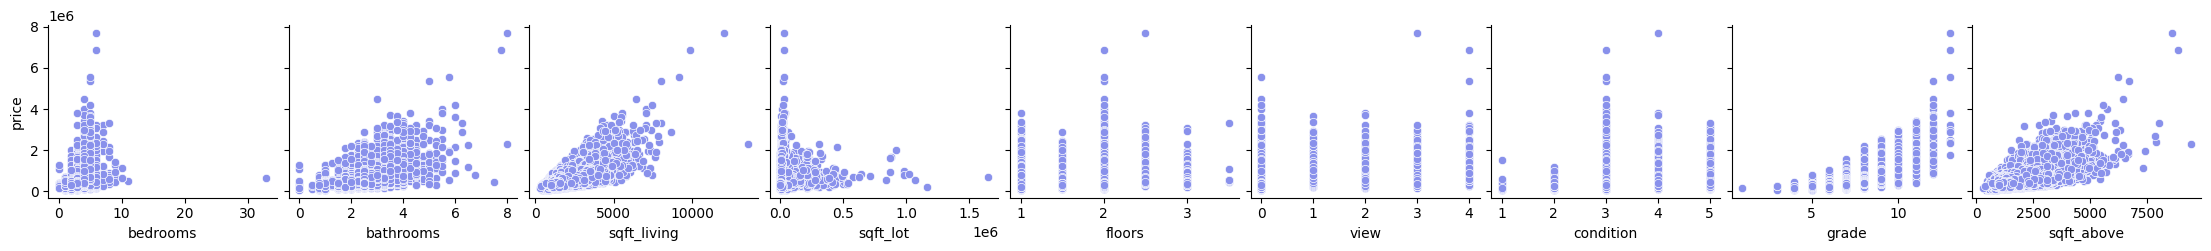

In [126]:
sns.pairplot(df_clean, y_vars='price', x_vars=['bedrooms', 'bathrooms', 'sqft_living',
                                               'sqft_lot', 'floors', 'view', 'condition',
                                               'grade', 'sqft_above'],
             plot_kws = {'color': '#8991EB'})

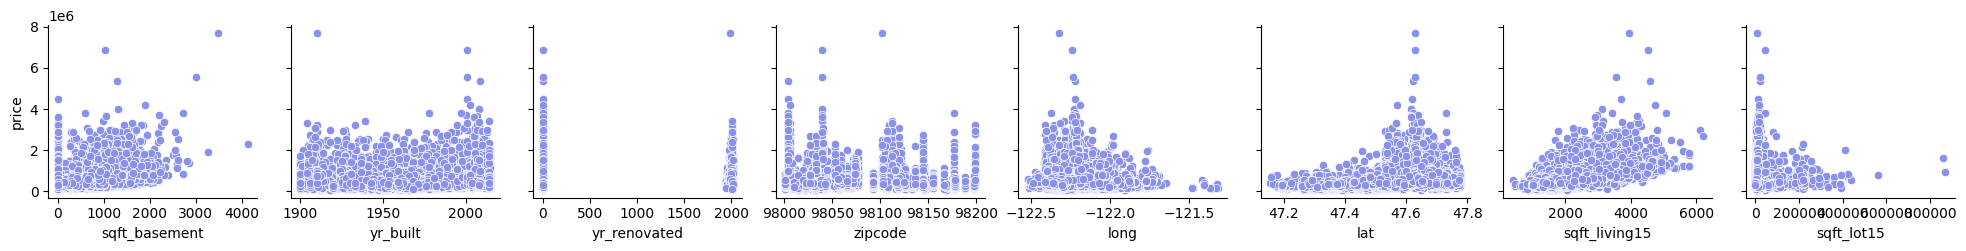

In [127]:
sns.pairplot(df_clean, y_vars='price', x_vars=['sqft_basement', 'yr_built',
                                               'yr_renovated', 'zipcode', 'long',
                                               'lat', 'sqft_living15', 'sqft_lot15'],
             plot_kws = {'color': '#8991EB'})

### **Borrar columnas innecesarias**

In [128]:
df_drp = df_clean.drop(['long'], axis=1)
df_drp.head(2)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,3,7,1180,0,1955,0,98178,47.5112,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,3,7,2170,400,1951,1991,98125,47.7210,1690,7639


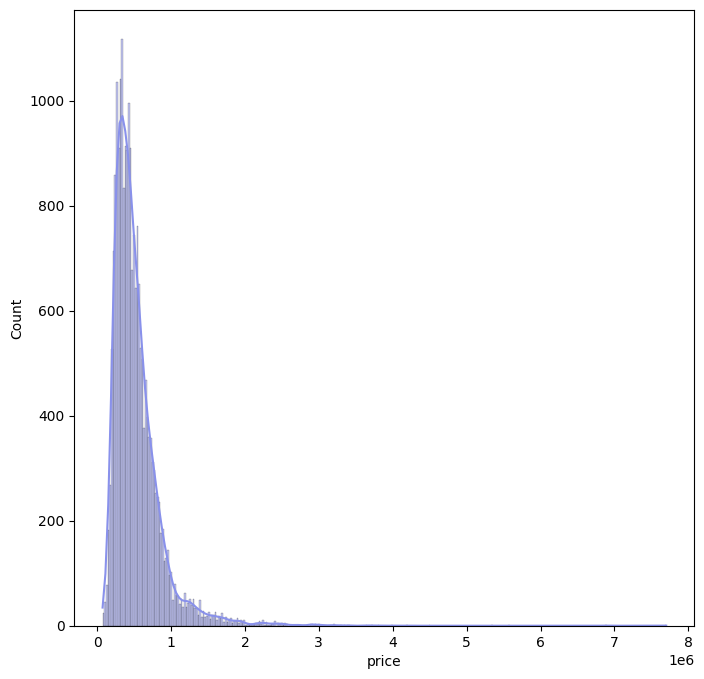

In [129]:
#Vemos la distribucion de la variable de salida (precio)
fig = plt.figure(figsize=(8,8))
ax= fig.add_subplot()
sns.histplot(data=df_drp, x='price', color='#8991EB', ax=ax, kde=True )
plt.show()

### **Distribución asimétrica a Distribución simétrica**
Al tener una distribución asimétrica en nuestra variable de salida, antes de hacer nuestro modelo de machine learning, debemos hacer que la distribución sea simétrica para que no hayan errores en las futuras predicciones. Para ello vamos a realizar una transformación logarítmica de las variables para tener una distribución más simétrica.

La transformación que vamos a hacer es la siguiente:

*log1p = log(1 + x)*

Mientras que la forma inversa, que la vamos a necesitar para obtener el valor original de la predicción, es:

*expm1 = exp(x) - 1*


In [130]:
#Generamos la transformación con FunctionTransformer de sklearn
ft = FunctionTransformer(np.log1p, validate= True)
transformer= ft.transform(df_drp)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but FunctionTransformer was fitted without feature names
  warnings.warn(


In [131]:
df_transformer = pd.DataFrame(transformer, columns=df_drp.columns)
df_transformer.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,sqft_living15,sqft_lot15
0,12.309987,1.386294,0.693147,7.074117,8.639588,0.693147,0.0,1.386294,2.079442,7.074117,0.000000,7.578657,0.000000,11.494548,3.881795,7.201171,8.639588
1,13.195616,1.386294,1.178655,7.852050,8.887791,1.098612,0.0,1.386294,2.079442,7.682943,5.993961,7.576610,7.596894,11.494008,3.886110,7.433075,8.941153
2,12.100718,1.098612,0.693147,6.647688,9.210440,0.693147,0.0,1.386294,1.945910,6.647688,0.000000,7.567346,0.000000,11.493019,3.886457,7.908755,8.995041
3,13.311331,1.609438,1.386294,7.581210,8.517393,0.693147,0.0,1.791759,2.079442,6.957497,6.814543,7.583756,0.000000,11.494120,3.881993,7.215975,8.517393
4,13.142168,1.386294,1.098612,7.427144,8.997271,0.693147,0.0,1.386294,2.197225,7.427144,0.000000,7.594884,0.000000,11.493488,3.883969,7.496097,8.923191


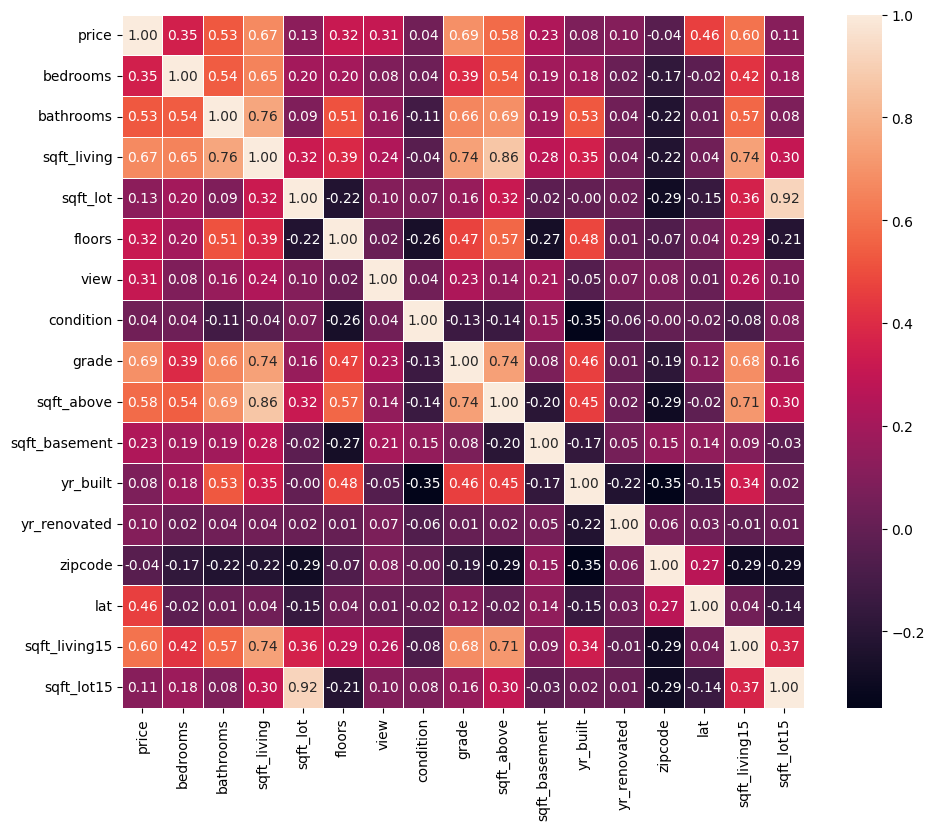

In [132]:
#Una vez hecha la transformación, volvemos a visualizar la correlación entre las columnas
fig = plt.figure(figsize= (11,9))
ax=fig.add_subplot()
sns.heatmap(df_transformer.corr(), annot=True, fmt= '.2f', linewidth= 0.5)
plt.show()

In [133]:
#Borramos las columnas que tienen alta correlación con otras
df_model = df_transformer.drop(['sqft_lot15', 'sqft_above'], axis=1)

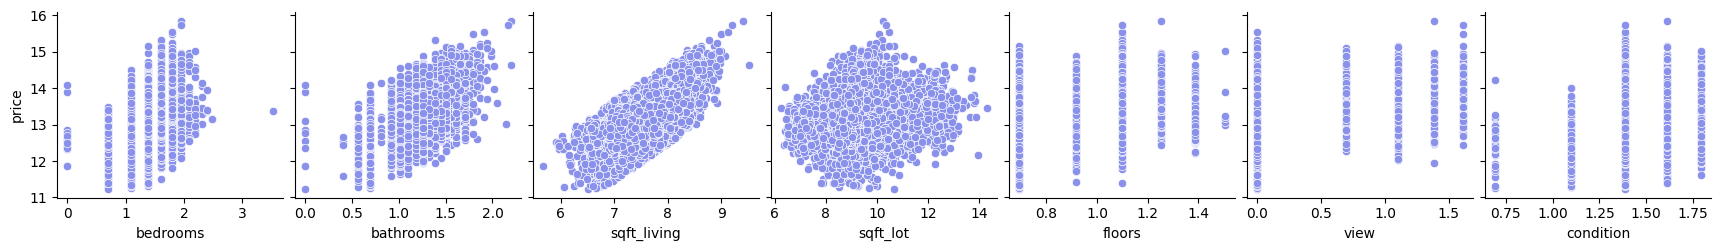

In [134]:
sns.pairplot(df_model, y_vars='price', x_vars=['bedrooms', 'bathrooms', 'sqft_living',
                                               'sqft_lot', 'floors', 'view',
                                               'condition'],
             plot_kws = {'color': '#8991EB'})

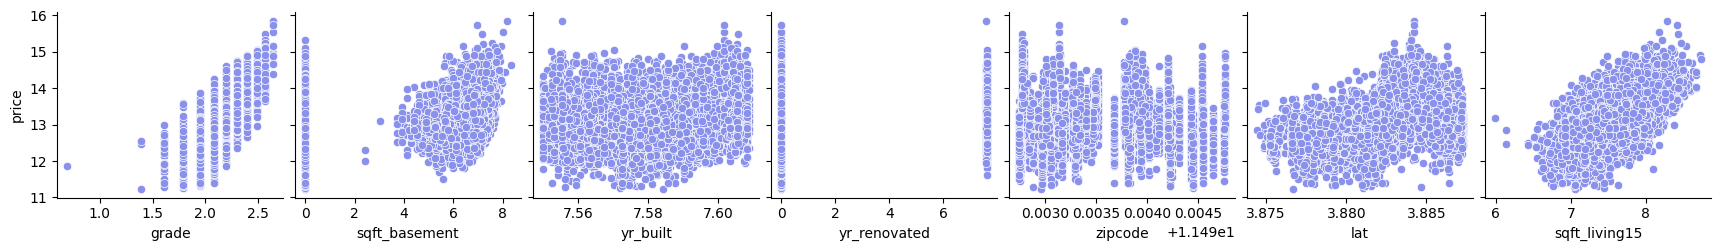

In [135]:
sns.pairplot(df_model, y_vars='price', x_vars=['grade','sqft_basement', 'yr_built',
                                               'yr_renovated', 'zipcode',
                                               'lat', 'sqft_living15'],
             plot_kws = {'color': '#8991EB'})

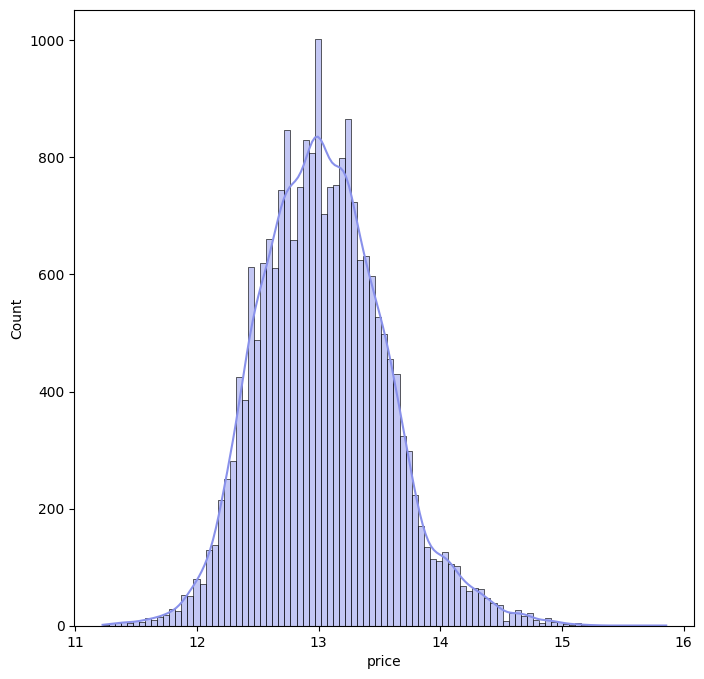

In [136]:
fig = plt.figure(figsize=(8,8))
ax= fig.add_subplot()
sns.histplot(data=df_model, x='price',color='#8991EB', ax=ax, kde=True )
plt.show()

Podemos ver que ahora los datos están mejor distribuidos, ahora procedemos a probar los distintos algoritmos de regresión lineal y elegir el que tenga mejores resultados.

## Crear modelo de regresión
![texto del enlace](https://drive.google.com/uc?id=1-tnkDpL0QX8cZTqZp5QnGYrJdHWlSPsK)

In [137]:
#creación de las variables X e y
X = df_model.drop('price', axis = 1)
y = df_model['price']

In [138]:
#set de entrenamiento de un 70% de entrenamiento y 30% de test
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.3, random_state=42)

### Funciones de validación

In [139]:
df_valid_models = pd.DataFrame(columns=['model', 'r2_score','RMSE', 'MAE', 'MSE' ])
df_cross_validation = pd.DataFrame(columns=['model','cross_validation'])

In [140]:
def validation(df, model, name, X_test= X_test, y_test= y_test):
    y_hat = model.predict(X_test)

    r2= r2_score(y_test,y_hat)
    rmse = np.sqrt(mean_squared_error(y_test, y_hat))
    mae = mean_absolute_error(y_test, y_hat)
    mse = mean_squared_error(y_test, y_hat)

    df_eval= pd.DataFrame({'model':[name], 'r2_score':[r2], 'RMSE':[rmse],
                           'MAE':[mae], 'MSE': [mse]})
    df_eval = pd.concat([df, df_eval])

    return df_eval, y_hat, r2
#******************************************************************************#
def cross_validation (df, model, name, X=X, y=y):
    val_cross = cross_val_score(model, X, y, scoring='r2', cv=5).mean()

    df_val_cross = pd.DataFrame({'model':[name], 'cross_validation':[val_cross]})
    df_val_cross = pd.concat([df, df_val_cross])

    return df_val_cross, val_cross

### **LinearRegression**

In [141]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

### **DecisionTreeRegressor**

In [142]:
from sklearn.tree import DecisionTreeRegressor
dtr= DecisionTreeRegressor(max_depth=5, random_state=42)
dtr.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=5, random_state=42)

### **RandomForestRegressor**

In [143]:
from sklearn.ensemble import RandomForestRegressor
rfr= RandomForestRegressor(max_depth=5, n_estimators=10, random_state=42)
rfr.fit(X_train,y_train)

RandomForestRegressor(max_depth=5, n_estimators=10, random_state=42)

## Validar modelos
![texto del enlace](https://drive.google.com/uc?id=1Axs2cpc_84iahQl7M0k8J0AnKyThmqCi)

In [144]:
df_valid_models, y_hat_lr, r2_lr = validation(df_valid_models, lr, 'LinearRegression')
df_cross_validation, cross_val_lr = cross_validation(df_cross_validation, lr, 'LinearRegression')

df_valid_models, y_hat_dtr, r2_dtr = validation(df_valid_models, dtr, 'DecisionTreeRegressor')
df_cross_validation, cross_val_dtr = cross_validation(df_cross_validation, dtr, 'DecisionTreeRegressor')

df_valid_models, y_hat_rfr, r2_rfr = validation(df_valid_models, rfr, 'RandomForestRegressor')
df_cross_validation, cross_val_rfr = cross_validation(df_cross_validation, rfr, 'RandomForestRegressor')

In [145]:
df_valid_models

,model,r2_score,RMSE,MAE,MSE
0,LinearRegression,0.758498,0.253221,0.195264,0.064121
0,DecisionTreeRegressor,0.760241,0.252306,0.188718,0.063658
0,RandomForestRegressor,0.780548,0.241385,0.178003,0.058267


In [146]:
df_cross_validation

,model,cross_validation
0,LinearRegression,0.754952
0,DecisionTreeRegressor,0.758683
0,RandomForestRegressor,0.781589


## Optimizar modelos
![texto del enlace](https://drive.google.com/uc?id=106t66YUwMeXV_2HI2RFy5wSjcjftuKl5)

### Función de validación para modelos optimizados

In [147]:
from sklearn.model_selection import RandomizedSearchCV
def best_model_random(model, name):
    print(f'MODELO {name.upper()}:')
    print(f'Mejor modelo:', model.best_estimator_)
    print(f'Mejores parametros:', model.best_params_)
    print(f'Mejor score:', model.best_score_)

### **Search DecisionTreeRegressor**

In [148]:
hiperparameter_dtr = {
    'criterion':['squared_error', 'absolute_error'],
    'max_depth': [4,6,8,10,12,14,16],
    'min_samples_leaf': [4,6,8,10,12],
    'min_samples_split':[6,8,10,12],
    'max_features':['sqrt', 'log2', 'auto']}
search_dtr= DecisionTreeRegressor()
dtr_random= RandomizedSearchCV(search_dtr, hiperparameter_dtr, scoring='r2', cv=5)

In [149]:
dtr_random.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/di

RandomizedSearchCV(cv=5, estimator=DecisionTreeRegressor(),
                   param_distributions={'criterion': ['squared_error',
                                                      'absolute_error'],
                                        'max_depth': [4, 6, 8, 10, 12, 14, 16],
                                        'max_features': ['sqrt', 'log2',
                                                         'auto'],
                                        'min_samples_leaf': [4, 6, 8, 10, 12],
                                        'min_samples_split': [6, 8, 10, 12]},
                   scoring='r2')

In [150]:
#Vemos cual es el mejor modelo
best_model_random(dtr_random, 'dtr_random')

MODELO DTR_RANDOM:
Mejor modelo: DecisionTreeRegressor(criterion='absolute_error', max_depth=12,
                      max_features='auto', min_samples_leaf=8,
                      min_samples_split=6)
Mejores parametros: {'min_samples_split': 6, 'min_samples_leaf': 8, 'max_features': 'auto', 'max_depth': 12, 'criterion': 'absolute_error'}
Mejor score: 0.8190751579497055


In [151]:
#Entrenamos el modelo con los mejores parámetros
search_dtr= dtr_random.best_estimator_
search_dtr.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


DecisionTreeRegressor(criterion='absolute_error', max_depth=12,
                      max_features='auto', min_samples_leaf=8,
                      min_samples_split=6)

### **Search_RandomForestRegressor**

In [152]:
hiperparameter_rfr = {
    'n_estimators':[150,200,250,300,350],
    'max_depth': [4,6,8,10,12,14,16],
    'min_samples_leaf': [4,6,8,10,12],
    'min_samples_split':[6,8,10,12]}

search_rfr= RandomForestRegressor()
rfr_random = RandomizedSearchCV(search_rfr, hiperparameter_rfr, scoring='r2', cv=5)

In [153]:
rfr_random.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': [4, 6, 8, 10, 12, 14, 16],
                                        'min_samples_leaf': [4, 6, 8, 10, 12],
                                        'min_samples_split': [6, 8, 10, 12],
                                        'n_estimators': [150, 200, 250, 300,
                                                         350]},
                   scoring='r2')

In [154]:
#Vemos cual es el mejor modelo
best_model_random(rfr_random, 'rfr_random')

MODELO RFR_RANDOM:
Mejor modelo: RandomForestRegressor(max_depth=16, min_samples_leaf=6, min_samples_split=8,
                      n_estimators=200)
Mejores parametros: {'n_estimators': 200, 'min_samples_split': 8, 'min_samples_leaf': 6, 'max_depth': 16}
Mejor score: 0.870905767998541


In [155]:
#Entrenamos el modelo con los mejores parámetros
search_rfr= rfr_random.best_estimator_
search_rfr.fit(X_train, y_train)

RandomForestRegressor(max_depth=16, min_samples_leaf=6, min_samples_split=8,
                      n_estimators=200)

## Validar modelos optimizados
![texto del enlace](https://drive.google.com/uc?id=1Axs2cpc_84iahQl7M0k8J0AnKyThmqCi)

In [156]:
df_valid_models,y_hat_search_dtr, r2_search_dtr = validation(df_valid_models, search_dtr, 'Search_DecisionTreeRegressor')
df_cross_validation, cross_val_search_dtr = cross_validation(df_cross_validation, search_dtr, 'Search_DecisionTreeRegressor')

df_valid_models, y_hat_search_rfr, r2_search_rfr = validation(df_valid_models, search_rfr, 'Search_RandomForestRegressor')
df_cross_validation, cross_val_search_rfr = cross_validation(df_cross_validation, search_rfr, 'Search_RandomForestRegressor')

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/di

In [157]:
df_valid_models

,model,r2_score,RMSE,MAE,MSE
0,LinearRegression,0.758498,0.253221,0.195264,0.064121
0,DecisionTreeRegressor,0.760241,0.252306,0.188718,0.063658
0,RandomForestRegressor,0.780548,0.241385,0.178003,0.058267
0,Search_DecisionTreeRegressor,0.822547,0.217061,0.155036,0.047115
0,Search_RandomForestRegressor,0.874764,0.182349,0.129114,0.033251


In [158]:
df_cross_validation

,model,cross_validation
0,LinearRegression,0.754952
0,DecisionTreeRegressor,0.758683
0,RandomForestRegressor,0.781589
0,Search_DecisionTreeRegressor,0.824085
0,Search_RandomForestRegressor,0.873902


## Usar Modelo
![texto del enlace](https://drive.google.com/uc?id=1K3W2py-vEot7DcY53jd9IaeHaR-thtxV)

Ahora vamos a usar el mejor modelo creado (Search_RandomForestRegressor) para predecir los siguientes datos de prueba

In [159]:
#Datos que le debemos dar al modelo excepto la variable de salida (price)
df_model.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_basement,yr_built,yr_renovated,zipcode,lat,sqft_living15
0,12.309987,1.386294,0.693147,7.074117,8.639588,0.693147,0.0,1.386294,2.079442,0.000000,7.578657,0.000000,11.494548,3.881795,7.201171
1,13.195616,1.386294,1.178655,7.852050,8.887791,1.098612,0.0,1.386294,2.079442,5.993961,7.576610,7.596894,11.494008,3.886110,7.433075
2,12.100718,1.098612,0.693147,6.647688,9.210440,0.693147,0.0,1.386294,1.945910,0.000000,7.567346,0.000000,11.493019,3.886457,7.908755
3,13.311331,1.609438,1.386294,7.581210,8.517393,0.693147,0.0,1.791759,2.079442,6.814543,7.583756,0.000000,11.494120,3.881993,7.215975
4,13.142168,1.386294,1.098612,7.427144,8.997271,0.693147,0.0,1.386294,2.197225,0.000000,7.594884,0.000000,11.493488,3.883969,7.496097


In [160]:
#Creamos los datos de prueba
df_prueba = pd.DataFrame({"bedrooms":[2], "bathrooms":[1], "sqft_living":[1090],
                         "sqft_lot":[5768], "floors":[1], "view":[0],
                          "condition":[3], "grade":[6],
                          "sqft_basement":[0], "yr_built":[1960], "yr_renovated":[0],
                          "zipcode":[98004], "lat":47.3456,"sqft_living15":[1374]})
df_prueba

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_basement,yr_built,yr_renovated,zipcode,lat,sqft_living15
0,2,1,1090,5768,1,0,3,6,0,1960,0,98004,47.3456,1374


Se debe hacer la misma transformación logarítmica que se hizo anteriormente para que el modelo pueda predecir el precio.

In [161]:
prueba_transform= ft.transform(df_prueba)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but FunctionTransformer was fitted without feature names
  warnings.warn(


In [162]:
df_prueba_transform = pd.DataFrame(prueba_transform, columns=df_prueba.columns)
df_prueba_transform

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_basement,yr_built,yr_renovated,zipcode,lat,sqft_living15
0,1.098612,0.693147,6.99485,8.660254,0.693147,0.0,1.386294,1.94591,0.0,7.58121,0.0,11.492774,3.878375,7.226209


In [163]:
#finalmente le damos al modelo los datos para predecir el precio
y_hat_prueba= search_rfr.predict(df_prueba_transform)
y_hat_prueba

array([12.11284257])

In [164]:
#Aplicamos np.expm1 para obtener el precio real
print("El precio para una casa con las caracteristicas dadas es:", np.expm1(y_hat_prueba))

El precio para una casa con las caracteristicas dadas es: [182195.77546094]
